<a href="https://colab.research.google.com/github/Vrishali04/Bike_sharing_demand_sharing_Regression_capstone_project/blob/main/Bike_sharing_demand_prediction_regression_capstone_project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


sns.set()

In [ ]:
# Mounting drive and read the csv file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Bike sharing demand Prediction Regression Project/SeoulBikeData.csv'
df = pd.read_csv(path, encoding='unicode_escape')

Checking first 5 rows of given data

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


Checking last 5 rows of given data

In [ ]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


List of columns present in our dataset

In [ ]:
# Extracting from pandas columns method

print('Columns in our data:')

df.columns

Columns in our data:


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

**Getting the shape of the dataset i.e. number of rows and columns**

In [ ]:
# Extracting from pandas shape method to get the shape of our dataset

print('Shape of our dataset : ')
df.shape

Shape of our dataset : 


(8760, 14)

In [ ]:
print('Count of Rows:',df.shape[0])
print('Count of Columns:',df.shape[1])

Count of Rows: 8760
Count of Columns: 14


**Checking the type of data present in each column of given dataset**

In [ ]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

### **Observation :**

There are **String**, **Interger** and **Float** data types in the given dataset.

Also **Date** column is in string format we have to convert it into **Datetime** format we will look into it further.

### **Checking the numerical and categorical feature count**

In [ ]:
# Selecting the categorical column only
cat_cols = df.select_dtypes(include = 'object').columns
print('count of categorical columns :',len(cat_cols))

count of categorical columns : 4


In [ ]:
# Selecting the numerical column only
num_cols = df.select_dtypes(include = 'number').columns
print('count of Numerical columns :',len(num_cols))

count of Numerical columns : 10


**Info of the dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

**5 statistical summary of the given dataset**

In [ ]:
# For numerical columns
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
# For categorical columns
df.describe(include='object')

,Date,Seasons,Holiday,Functioning Day
count,8760,8760,8760,8760
unique,365,4,2,2
top,01/12/2017,Spring,No Holiday,Yes
freq,24,2208,8328,8465


**Data cleaning and handling i.e.**

**Handling missing values and duplicate data present in the given dataset**

### **Extracting the missing value**

In [ ]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### **Observation :**

There is no missing value present in our dataset

**Extracting the duplicate data present in our dataset**

In [ ]:
df[df.duplicated()].shape


(0, 14)

### **Observation :**

Here we can observ that there is no missing value in our dataset



### **Feature understanding and transformation**

* **As we have already seen that the date column is in string for and we have to convert it into datetime format**

In [ ]:
# changing from string to datetime format using pandas to_datetime function
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.dtypes

Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature(°C)                     float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(°C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons                              object
Holiday                              object
Functioning Day                      object
dtype: object

### **Now we can see that we have chaged our Date column to datetime format**

### **We need more columns to analyse our data as we can extract days, months, years form our Date column which will help us to check the data particularly day wise as well as month wise and yearly also**

In [ ]:
# creating a day column
df['day'] = df['Date'].dt.day_name()

# creating a month column
df['month'] = df['Date'].dt.month_name()

# creating a year column
df['year'] = df['Date'].dt.year

In [ ]:
df.dtypes

Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature(°C)                     float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(°C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons                              object
Holiday                              object
Functioning Day                      object
day                                  object
month                                object
year                                  int64
dtype: object

#### **As we can see that we have created 3 new column day, month and year from Date column**

### Exploratory Data Analysis (EDA)

1. Exploratory Data Analysis can be defined as it is process of performing initial investigations on a data with the help of      different patterns and graphical representations. In EDA we observe the data from multiple angles so that we can grab the      desired analysis outcome.


2. In EDA, we are going to explore the data and we will try to find the missing data as well the outliers present in our          dataset. Also we will check different data types present in different forms and visualize our data to get more insights from    data so that we can properly understand what actually the data is.

**Let us now check the distriburion of each column in our dataset**

In [ ]:
num_cols

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

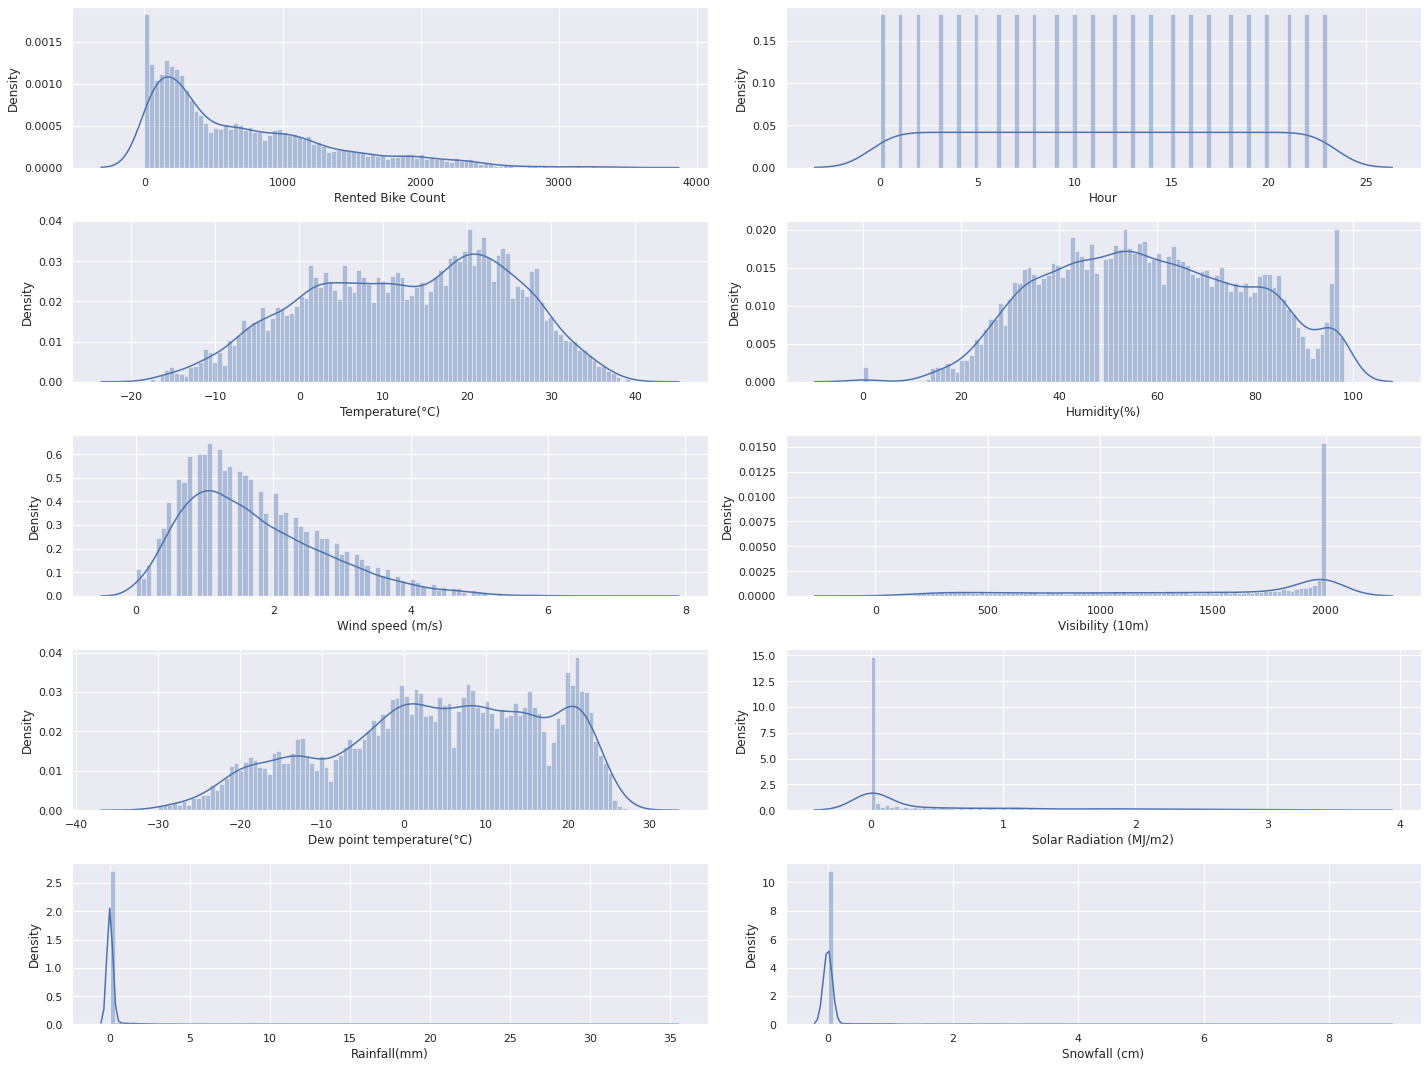

In [ ]:
plt.figure(figsize=(20,15))
count= 1
for column in num_cols:   
    
    plt.subplot(5,2,count)
    count += 1
    sns.distplot(df[column], bins = 100)
    
    plt.tight_layout()

### **Observation:**
* **Here we can see that Rented Bike count is postively skewed**
* **and temperatur is also not correctly distributed**
* **and also windspeed column is skewed**


### * There can be many reason to all different distribution of columns we will try to look the outliers and try to analyse it more

### **Checking outliers**

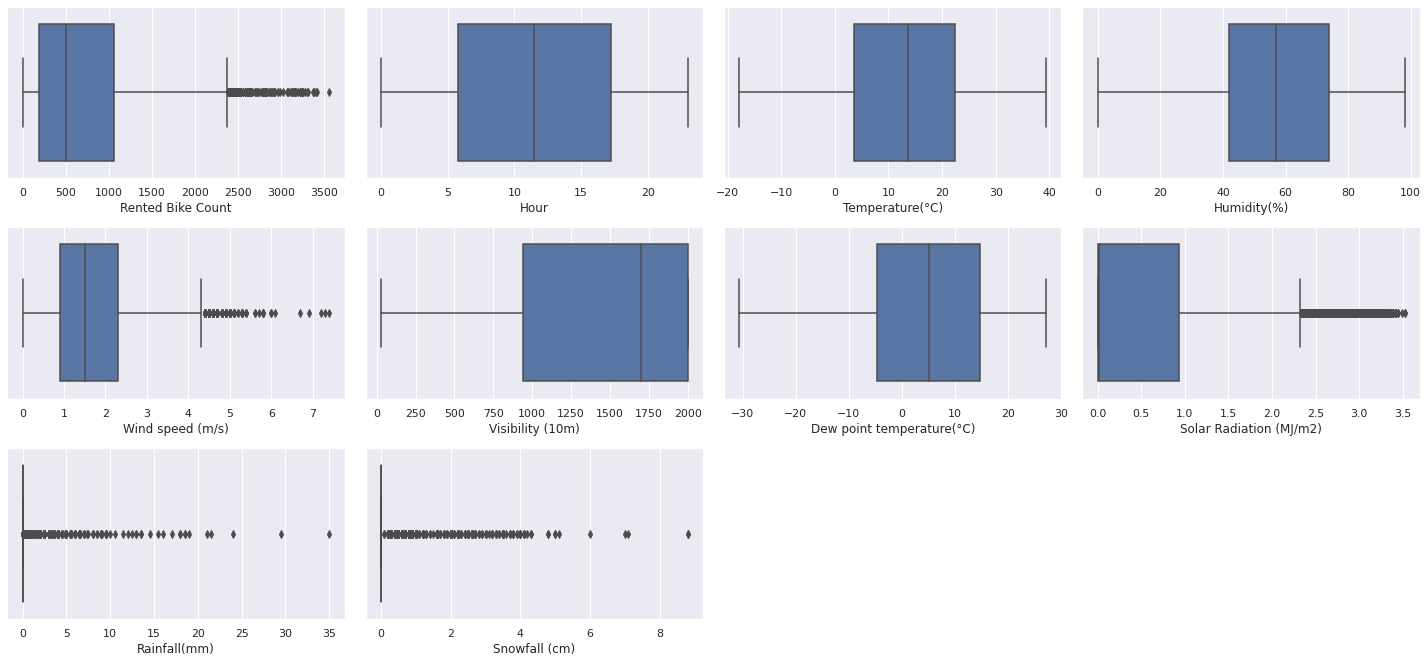

In [ ]:
plt.figure(figsize=(20,15))
count= 1
for column in num_cols:   
    
    plt.subplot(5,4,count)
    
    count += 1
    sns.boxplot(df[column])
    
    plt.tight_layout()

### **Observation :**

* **We can observe here that many columns like rented bike count, solar radiation, rainfall, snowfall contains outliers**


**We will look into it more and treat the outliers also**

## **Univariate Analysis**

* Univariate analysis is the simplest form of analyzing the data. "Uni" means "One" , it means your data has only one variable. It does not deal with causes or relationships (unlike regression) and its primary goal is to describe; it gathers data, summarises it, and looks for patterns.

**let us see the season wise popularity of the bike demand**

In [ ]:
# Extracting count for each season 
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

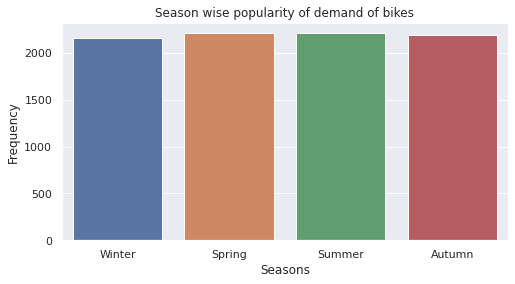

In [ ]:
# ploting it using seaborn countplot
plt.figure(figsize = (8,4))
plt.title('Season wise popularity of demand of bikes')

sns.countplot(df['Seasons'])

plt.xlabel('Seasons')
plt.ylabel('Frequency')

plt.show()

### **Observation :**

* **We can observe here that there almost each season has the same popularity for the bike demands only small lower popularity in winter and autumn season**

**let us see the Function day wise popularity of the bike demand**

In [ ]:
# Extracting functioning day
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

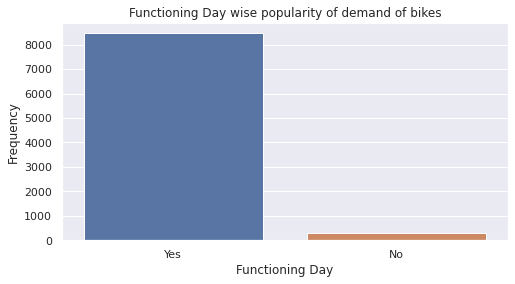

In [ ]:
# ploting it using seaborn countplot
plt.figure(figsize = (8,4))
plt.title('Functioning Day wise popularity of demand of bikes')

sns.countplot(df['Functioning Day'])

plt.xlabel('Functioning Day')
plt.ylabel('Frequency')

plt.show()

### **Observation :**

* **We can observe here that
there high demand in fuctioning day but almost no demand or very little demand in non functioning day it indicates very less people like to use rented bikes if they are free and not working on specific day**

**let us see the holiday wise popularity of the bike demand**

In [ ]:
# Extracting holiday wise demand
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

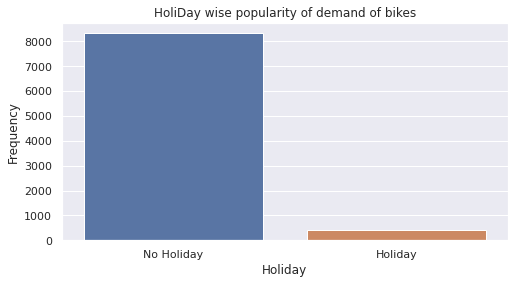

In [ ]:
# ploting it using seaborn countplot
plt.figure(figsize = (8,4))
plt.title('HoliDay wise popularity of demand of bikes')

sns.countplot(df['Holiday'])

plt.xlabel('Holiday')
plt.ylabel('Frequency')

plt.show()

### **Observation :**

* **We can observe here that there high demand in non holiday but almost no demand or very little demand in Holiday it indicates the same that very less people like to use rented bikes if they are free and not working on specific day**

**Creating Weekday column to get the weekday analysis** 

In [ ]:
df['weekday'] = df['Date'].dt.weekday

In [ ]:
df.dtypes

Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature(°C)                     float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(°C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons                              object
Holiday                              object
Functioning Day                      object
day                                  object
month                                object
year                                  int64
weekday                               int64
dtype: object

In [ ]:
df['weekday'].unique()

array([3, 6, 2, 4, 0, 5, 1])

#### Here,
**0 - Monday | 1 - Tuesday | 2 - Wednesday | 3 - Thursday | 4 - Friday | 5 - Saturday | 6 - Sunday**

**let us see the Daily popularity of the bike demand**

In [ ]:
# Extracting daily demand
df['day'].value_counts()

Sunday       1296
Wednesday    1272
Tuesday      1272
Thursday     1248
Saturday     1248
Friday       1224
Monday       1200
Name: day, dtype: int64

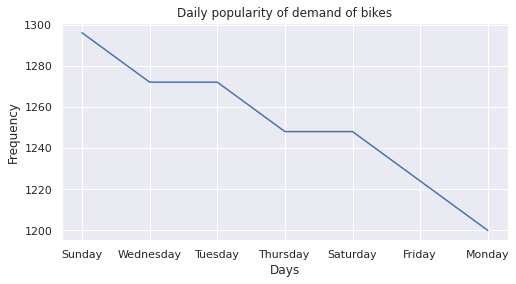

In [ ]:
# ploting it using seaborn lineplot
plt.figure(figsize = (8,4))
plt.title('Daily popularity of demand of bikes')

sns.lineplot(x = df['day'].value_counts().index,y = df['day'].value_counts().values)
plt.xlabel('Days')
plt.ylabel('Frequency')

plt.show()

### **Observation :**

* **We can see that the whole month is almost constant demand of bike but in the month end there is quite low demand**

**let us see the Weekly popularity of the bike demand**

In [ ]:
# Extracting weekly demand
df['day'].value_counts()

Sunday       1296
Wednesday    1272
Tuesday      1272
Thursday     1248
Saturday     1248
Friday       1224
Monday       1200
Name: day, dtype: int64

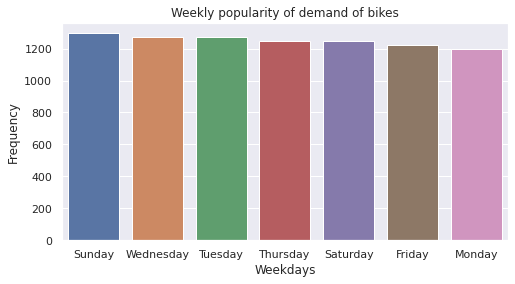

In [ ]:
# ploting it using seaborn lineplot
plt.figure(figsize = (8,4))
plt.title('Weekly popularity of demand of bikes')

sns.barplot(x = df['day'].value_counts().index,y = df['day'].value_counts().values)

plt.xlabel('Weekdays')
plt.ylabel('Frequency')

plt.show()

### **Observation :**

* **We can see that the in the beginning of the week and in the middle of the week it falls down and again in week ends again it starts to rise**

**let us see the monthly popularity of the bike demand**

In [ ]:
# Extracting monthly demand
df['month'].value_counts()

January      744
March        744
May          744
July         744
August       744
October      744
December     744
April        720
June         720
September    720
November     720
February     672
Name: month, dtype: int64

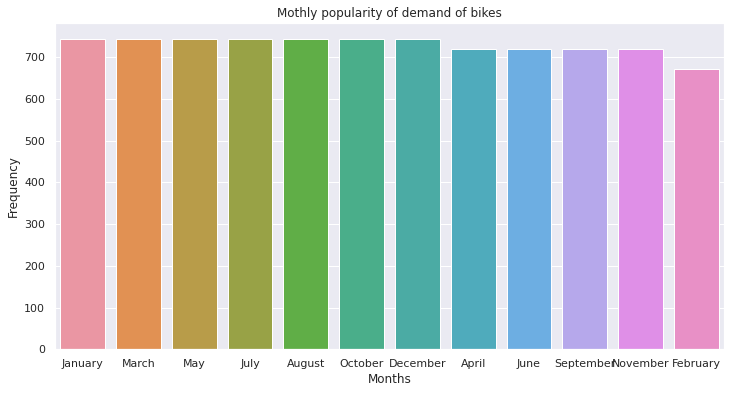

In [ ]:
# ploting it using seaborn barplot
plt.figure(figsize = (12,6))
plt.title('Mothly popularity of demand of bikes')

sns.barplot(x = df['month'].value_counts().index,y = df['month'].value_counts().values)

plt.xlabel('Months')
plt.ylabel('Frequency')

plt.show()

### **Observation :**

* **We can observe that there is there is almast same or constant bike deemand but somewhat low in the month of feb**

## **Bivariate Analysis**

* Bivariate analysis is one of the simplest form of statistical analysis. It involves analysis of two variables (often denoted as 'X' , and 'Y') for the purpose of determining relationship between them. 

### **Comparing all Numerical features with Rented Bike Count so that to get the insight about the factors affecting the Rented Bike Demand**

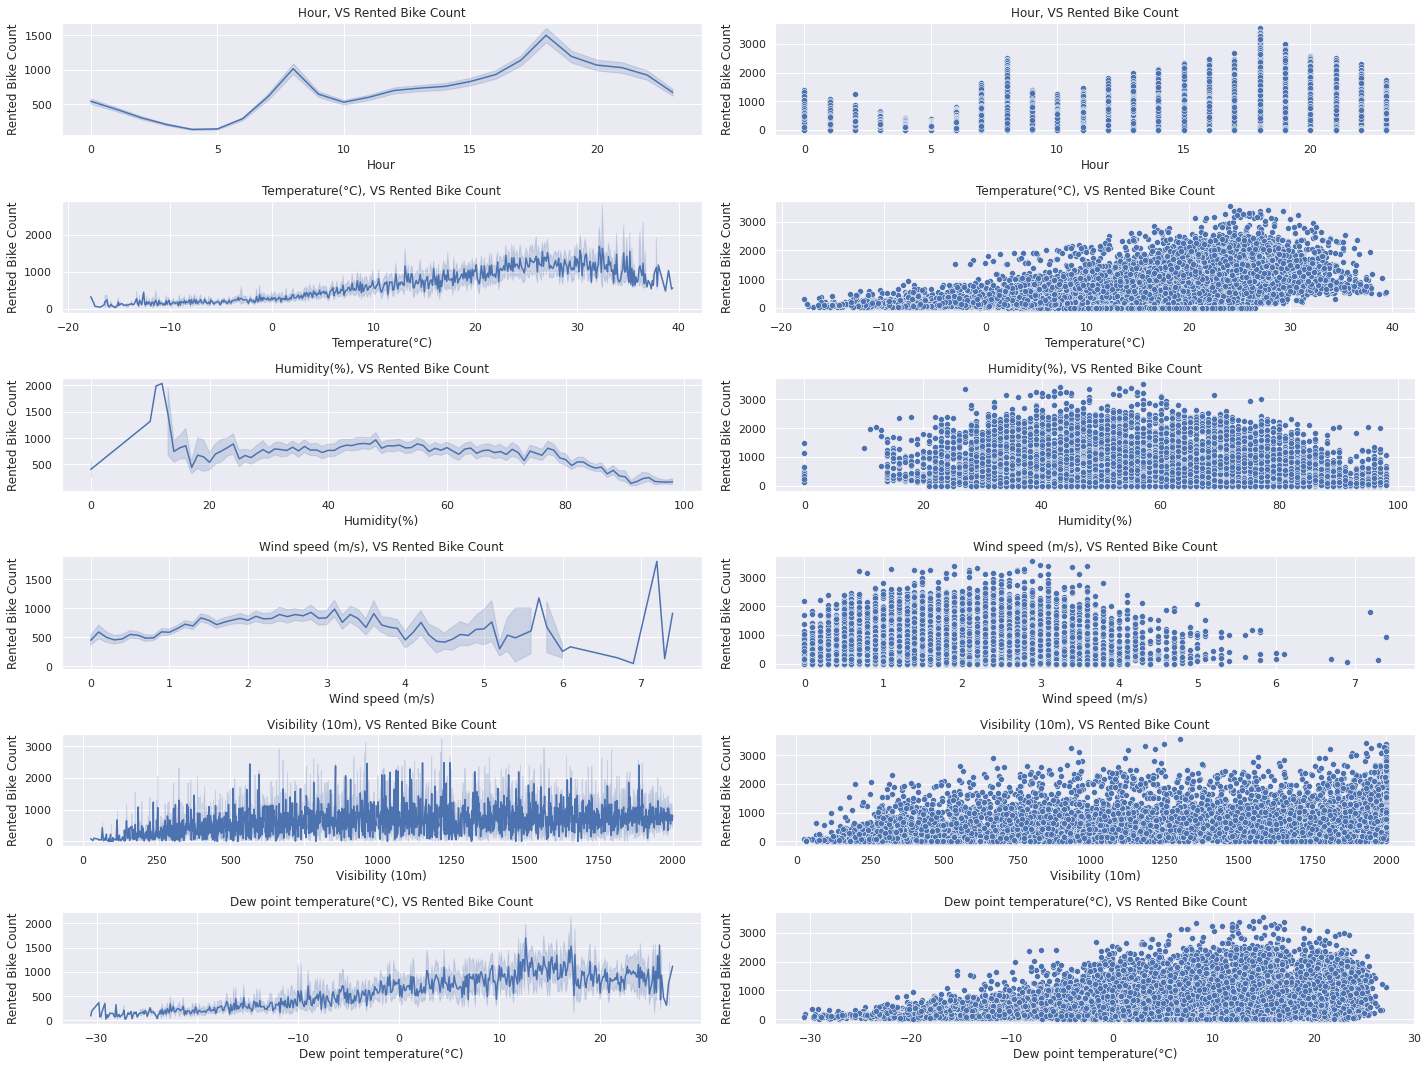

In [ ]:
plt.figure(figsize=(20,15))
count= 1

for column in df.select_dtypes(include = 'number').columns[1:7]:   
    plt.subplot(6, 2,count)
    count += 1
    # Ploting Lineplot
    plt.title(f'{column}, VS Rented Bike Count')
    sns.lineplot(df[column],df['Rented Bike Count'])
    plt.subplot(6, 2,count)
    count += 1
    # Ploting Scatter Plot
    plt.title(f'{column}, VS Rented Bike Count')
    sns.scatterplot(df[column],df['Rented Bike Count'])
    
    plt.tight_layout()

### **Observation :**

* In the morning there is not that much deemand but after 10 AM rental bike deemand rises as customers have their working timings and afte 7PM-8PM it starts drop as customers are done with there daily work to thats why they donot requires rental bikes.


* when temorature is low it is very low chance of having booking of rental bike but as the temperature starts rising the demand starts increase.



* Whenever the humidity is lower customers has more demand of the rental bikes but in the higher humidity the demand also decreases


* At moderate windspeed there is not effect on rental bike demand but at higher windspeed there is quite low demand of rental bikes i.e there is deemand but very less number of customers tends to have rental bikes.


* Low visibility tends to have less demand of rental bikes other wise it doesn't effect in the rental bike demand.


* As the dew point is very low than the deemand also decreases as it is harder for the people to go outside so the demand is low.

**Let us look into the ScatterPlot for each numerical column with Rented Bike Count**

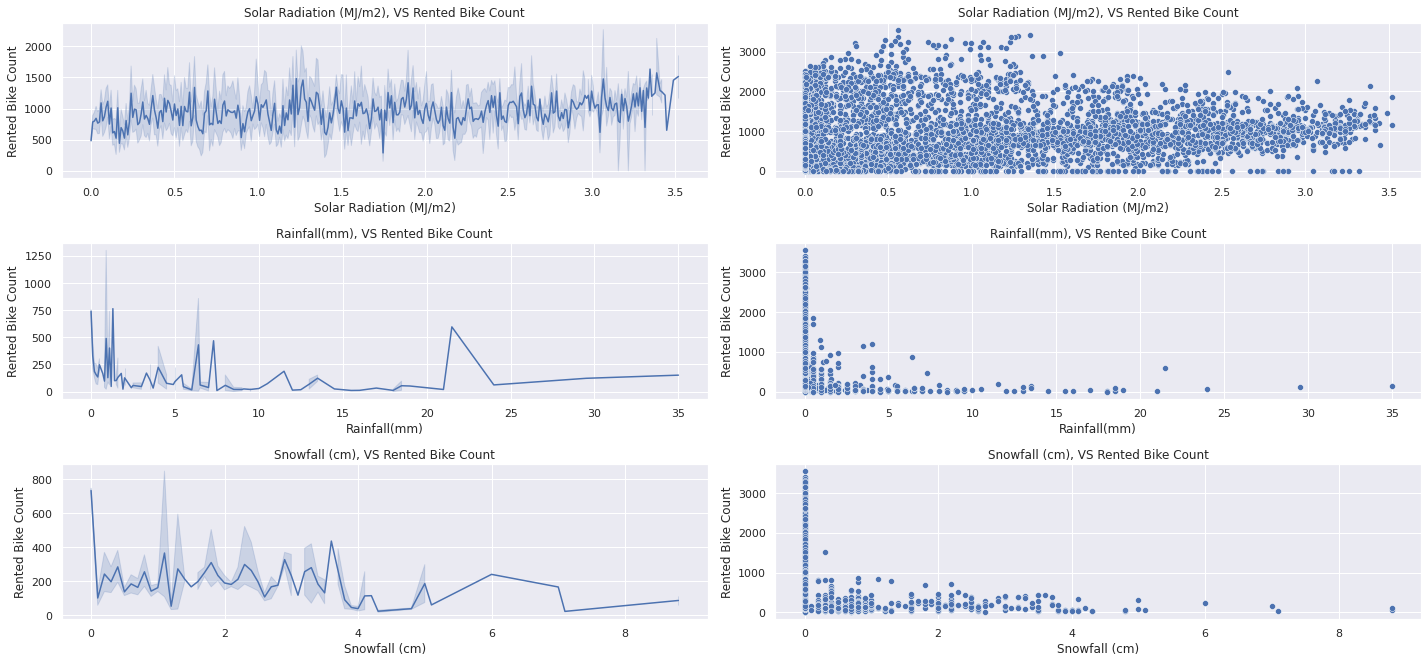

In [ ]:
plt.figure(figsize=(20,15))
count= 1

for column in df.select_dtypes(include = 'number').columns[7:-2]:   
    plt.subplot(5, 2,count)
    count += 1
    # Ploting Lineplot
    plt.title(f'{column}, VS Rented Bike Count')
    sns.lineplot(df[column],df['Rented Bike Count'])
    
    plt.subplot(5, 2,count)
    count += 1
    
    # Ploting Scatter Plot
    plt.title(f'{column}, VS Rented Bike Count')
    sns.scatterplot(df[column],df['Rented Bike Count'])
    
    plt.tight_layout()

### **Observation :**

* We can observe from the above result that if the solar radiation is low then the rented bike demand is high as if it tends to increase the rented bike demand starts to decrease


* Also the Railfall rat is lower, Higher the rented bike demand.



* Snow fall rate also indicates the same as rain if snow fall rate is higher than the rented bike demand is lower and vice-versa.

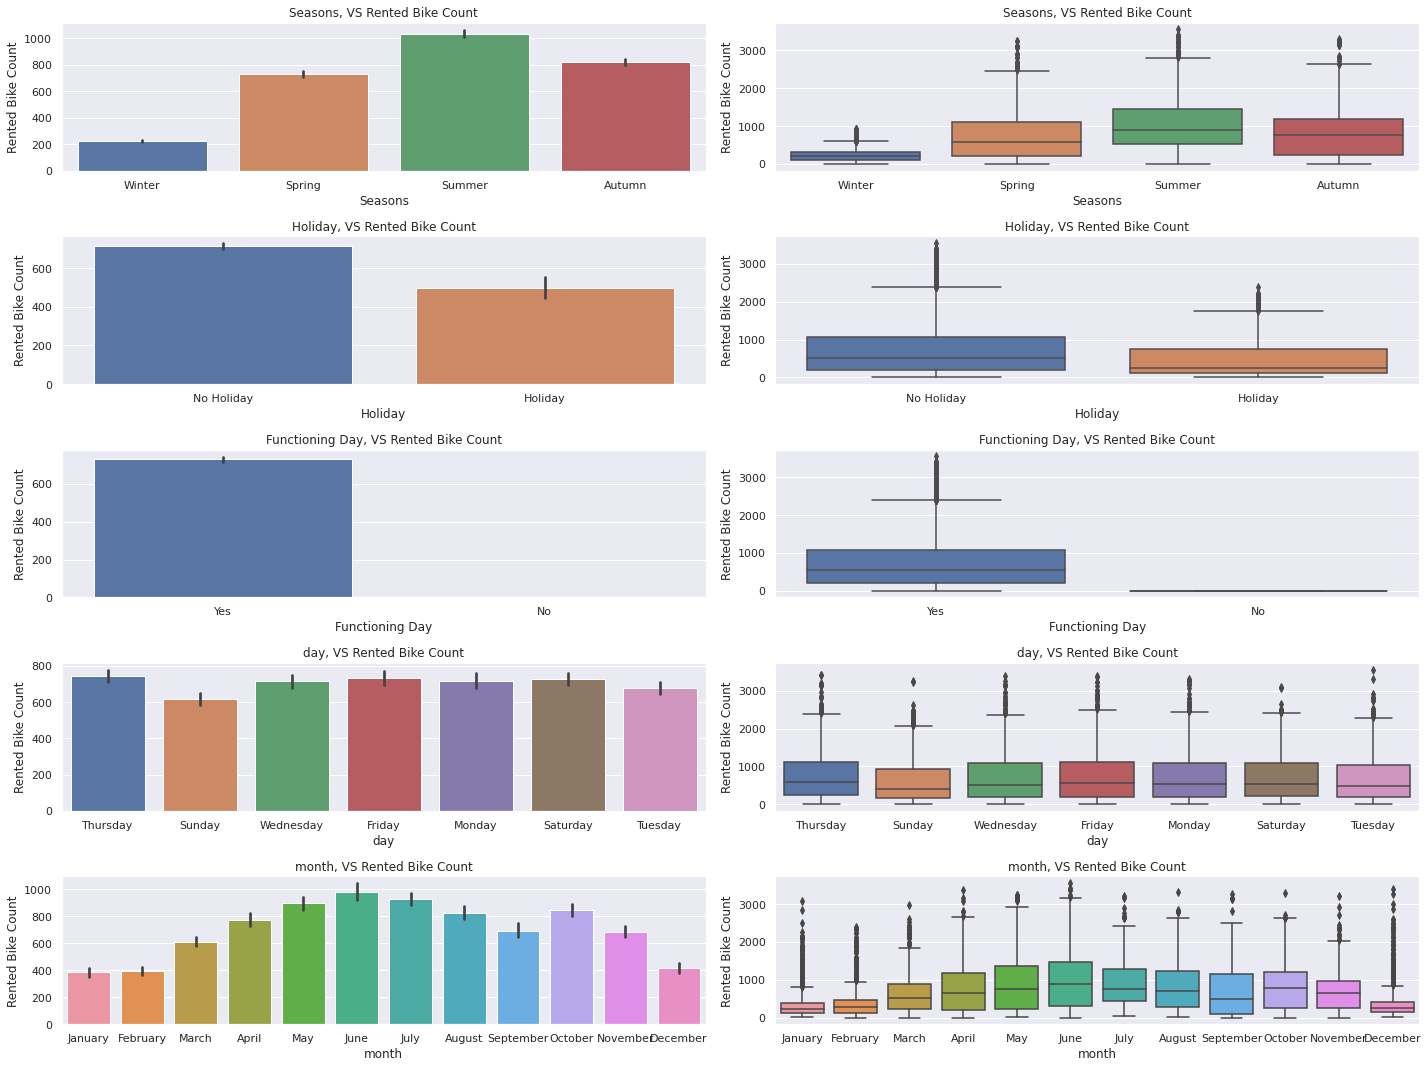

In [ ]:
plt.figure(figsize=(20,15))
count= 1

for column in df.select_dtypes(include = 'object').columns:   
    plt.subplot(5, 2,count)
    count += 1
    
    plt.title(f'{column}, VS Rented Bike Count')
    sns.barplot(df[column],df['Rented Bike Count'])
    
    plt.subplot(5,2,count)
    
    count+= 1
    plt.title(f'{column}, VS Rented Bike Count')
    sns.boxplot(df[column],df['Rented Bike Count'])
    
    plt.tight_layout()

### **Observation :**

* Here we can observe that there is quit less demand of rented bikes in the winter season and higher deemand in summer season.


* Non Holidays are having high deemand of rental bikes rather than Holidays.


* When there is fuctioning day the customers ends to have rental bikes but in non functioning day there is no deemand of rental bikes.


* on weekends there is less demand of rental bikes may due to on weekends people do not have functioning day.


* from year end to feb there is drop in rental bike deemand at due to the winter season and in other whole year there is high deemand of rental bikes.

**Yearly Rented Bike Percentage**

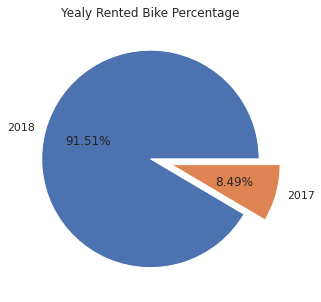

In [ ]:
plt.figure(figsize = (10,5))

plt.pie(df['year'].value_counts(),labels = df['year'].value_counts().keys().tolist(),autopct='%.2f%%',explode = [0,0.2])

plt.title('Yealy Rented Bike Percentage')

plt.show()

### **Observation :**

* We can see that 2017 has very less count of demand as it is due to the less availability of the data for the year 2017.